In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [51]:
class Robot:
    def __init__(self, x, y, rad):
        # ステップごとのロボットの姿勢の真値が入った配列
        self.actual_poses = [np.array([[x],
                                       [y],
                                       [rad]])]
        
    def move(self,fw,rot):
        # 移動前の位置を保存
        [px], [py], [pt] = self.actual_poses[-1]
        
        #入力ベクトル
        u = np.array([[fw],
                      [rot]])
        
        B = np.array([[np.cos(pt), 0],
                      [np.sin(pt), 0],
                      [0         , 1]])
        
        X = self.actual_poses[-1] + B.dot(u)
        # 移動後の位置を計算
        
        self.actual_poses.append(X)
        
    def draw(self, sp):
        xs = [e[0] for e in self.actual_poses]
        ys = [e[1] for e in self.actual_poses]
        vxs = [np.cos(e[2]) for e in self.actual_poses]
        vys = [np.sin(e[2]) for e in self.actual_poses]
        plt.quiver(xs,ys,vxs,vys,color="red",label="actual robot motion",alpha=0.5)

In [52]:
def draw(i):
    # グラフの設定
    fig = plt.figure(i, figsize=(8,8))
    sp = fig.add_subplot(111,aspect='equal')
    sp.set_xlim(-1.0,1.0)
    sp.set_ylim(-0.5,1.5)
    
    robot.draw(sp)
    
    plt.legend()

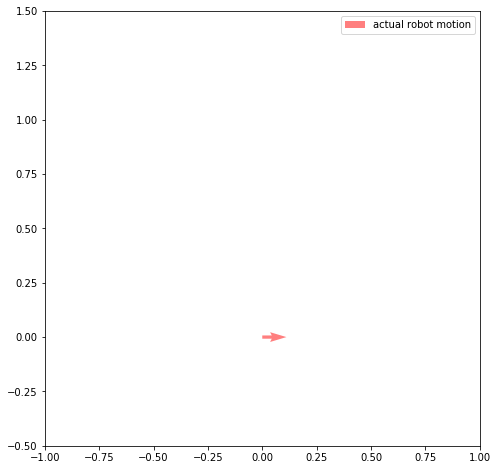

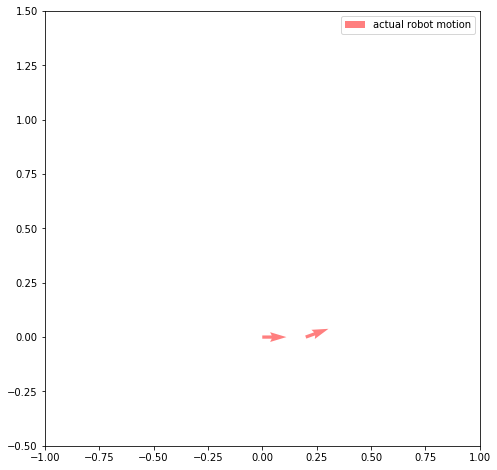

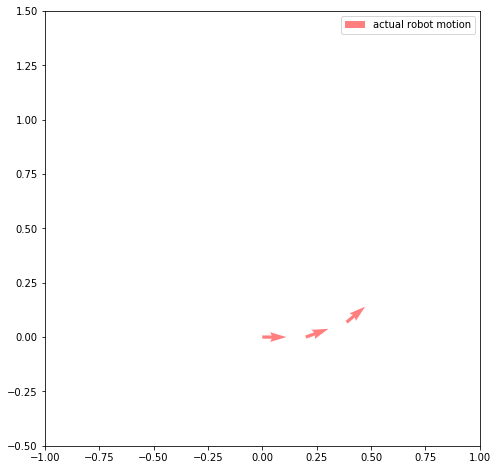

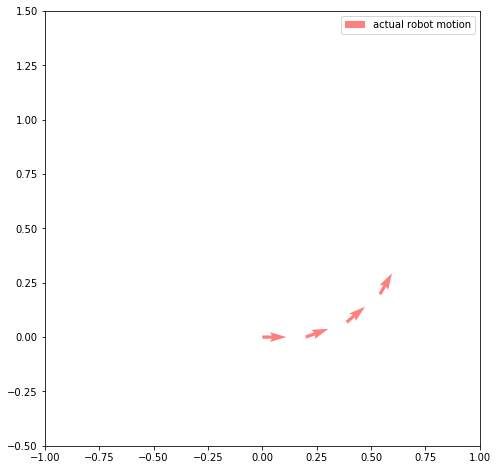

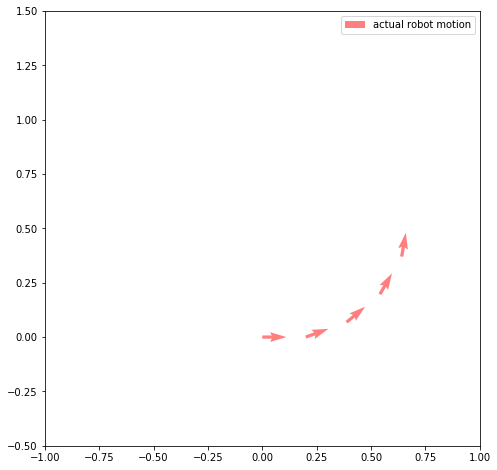

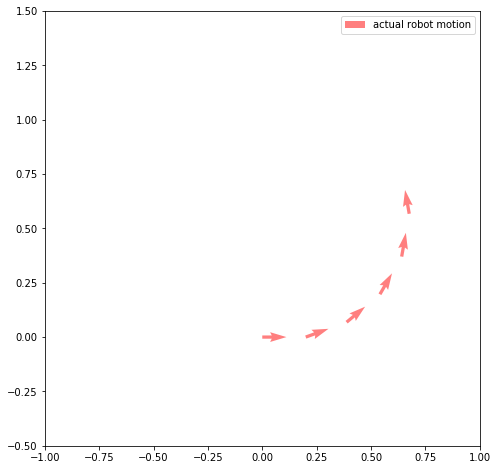

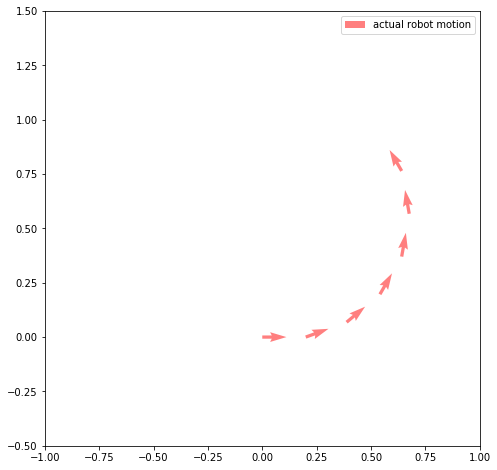

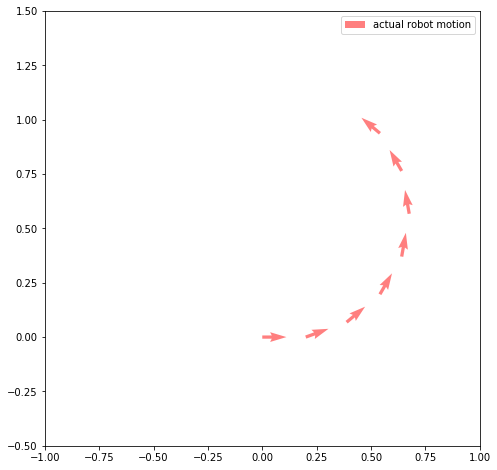

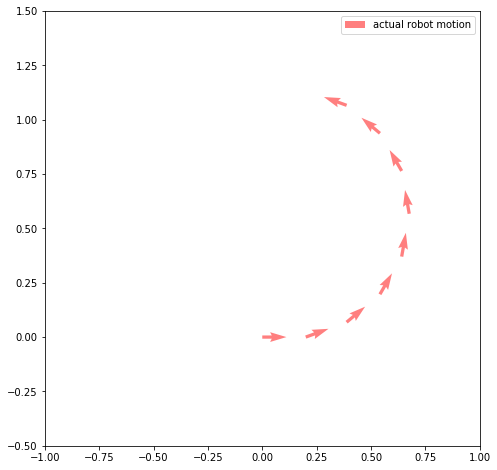

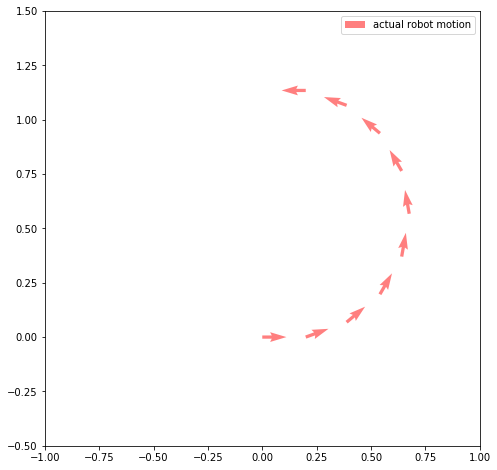

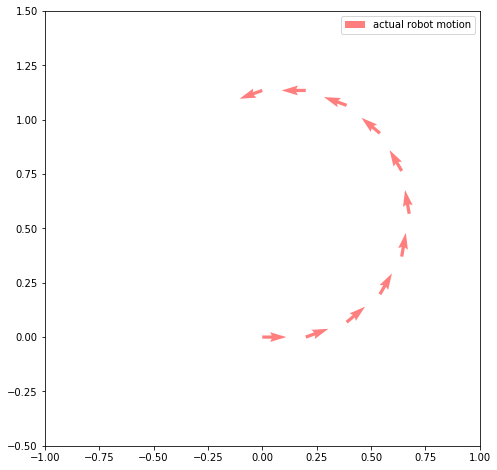

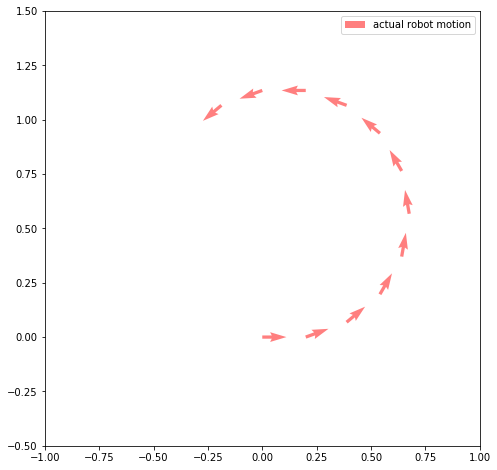

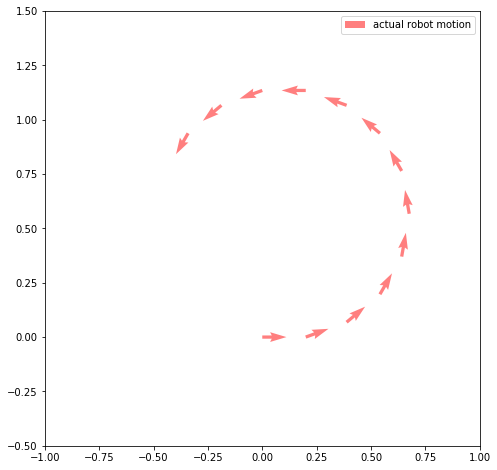

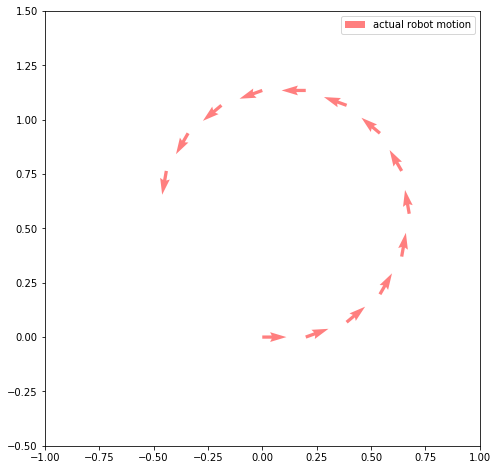

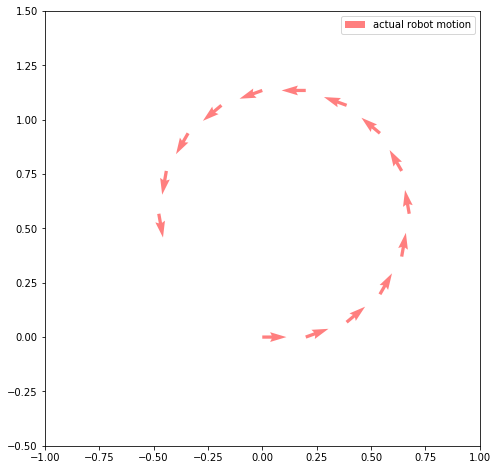

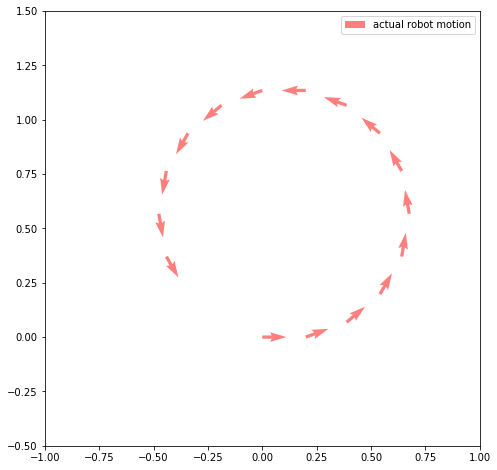

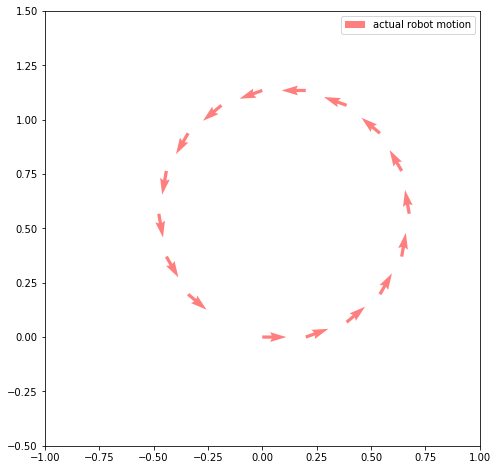

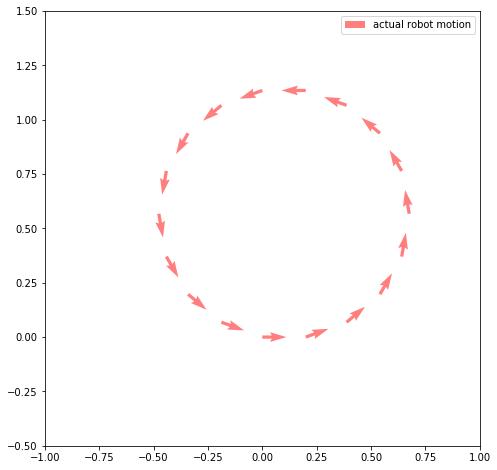

In [55]:
robot = Robot(0,0,0)   #ロボット設置
draw(0)

for i in range(1, 18):
    robot.move(0.2,np.pi / 180.0 * 20)     #ロボットの移動
    draw(i)